In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:    warnings.simplefilter("ignore")

In [4]:
training_data = pd.read_csv("train_data.csv")

In [5]:
training_data.columns

Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listedcount', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot'],
      dtype='object')

In [6]:
training_data.head()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,1.953701e+08,195370058,kanyejordan,None,This is what I do. I drop truth bombs.,None,2925,3,139,9/26/2010 14:45,0,False,708,en,"Status(in_reply_to_status_id=None, favorited=F...",True,False,FALSE,Kanye Jordan,1
1,7.950000e+17,7.95E+17,astronaut_bot,None,Keeping an eye on astronauts coming and going....,None,9,0,5,Fri Nov 04 12:11:27 +0000 2016,0,False,6,en,{'created_at': 'Tue Nov 22 16:52:31 +0000 2016...,True,False,FALSE,Astronaut Notifier,1
2,2.976541e+09,2976541239,TheRiddlerBot,"Coimbra, Portugal",Solve the riddle by replying only the name of ...,https://t.co/1v8BON9QpT,132,46,24,1/13/2015 15:10,740,False,7346,en,"Status(contributors=None, truncated=False, tex...",True,False,FALSE,TheRiddlerBot,1
3,2.243832e+08,224383150,mlegoudes262,None,None,None,54,1351,0,Wed Dec 08 21:29:31 +0000 2010,2,False,6,en,"{'truncated': False, 'entities': {'user_mentio...",True,False,FALSE,Laurie Poulsen,1
4,1.134712e+07,11347122,GavinNewsom,California,Husband & father. 49th Lt. Gov. of California ...,https://t.co/XrGnfzTDJD,1300380,24248,7089,Wed Dec 19 19:53:42 +0000 2007,4184,True,8536,en,"{u'contributors': None, u'truncated': True, u'...",False,False,FALSE,Gavin Newsom,0


In [7]:
training_data.corr(method='spearman')

,id,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,bot
id,1.000000,-0.655429,-0.384843,-0.593823,-0.418945,-0.597180,-0.422254,0.523385,0.156267,0.647401
followers_count,-0.655429,1.000000,0.334664,0.892426,0.423645,0.698791,0.621169,-0.484850,-0.261520,-0.443702
friends_count,-0.384843,0.334664,1.000000,0.151789,0.632833,0.341174,0.045011,-0.301672,-0.068066,-0.489031
listedcount,-0.593823,0.892426,0.151789,1.000000,0.308587,0.690671,0.663653,-0.430660,-0.239652,-0.287906
favourites_count,-0.418945,0.423645,0.632833,0.308587,1.000000,0.375864,0.267227,-0.355512,-0.215598,-0.527170
verified,-0.597180,0.698791,0.341174,0.690671,0.375864,1.000000,0.305778,-0.405380,-0.119575,-0.498508
statuses_count,-0.422254,0.621169,0.045011,0.663653,0.267227,0.305778,1.000000,-0.359065,-0.253225,-0.048176
default_profile,0.523385,-0.484850,-0.301672,-0.430660,-0.355512,-0.405380,-0.359065,1.000000,0.223542,0.420390
default_profile_image,0.156267,-0.261520,-0.068066,-0.239652,-0.215598,-0.119575,-0.253225,0.223542,1.000000,0.115574
bot,0.647401,-0.443702,-0.489031,-0.287906,-0.527170,-0.498508,-0.048176,0.420390,0.115574,1.000000


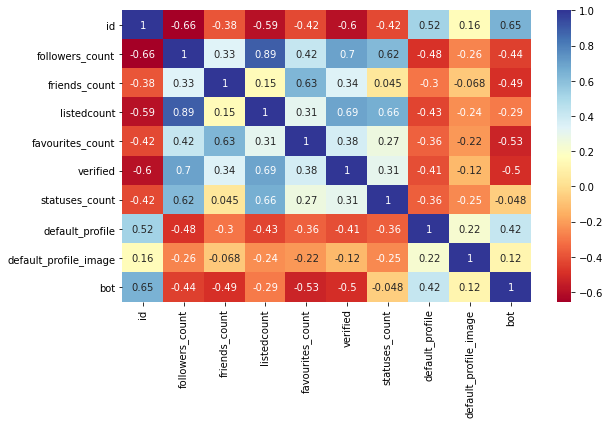

In [8]:
#using spearman correlation
plt.figure(figsize=(9,6))
sns.heatmap(training_data.corr(method='spearman'), cmap='RdYlBu', annot=True)
plt.tight_layout()
plt.show()

In [13]:
testing_data = pd.read_csv("test_data.csv")

In [14]:
testing_data.head()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,2.651040e+08,265104007,TonyFergusonXT,On a Boat,Fam Man | Fighter | Future Champ | Gamer | #Sn...,https://t.co/XfF4Xfn4Rs,59756,1134,490,3/13/2011 1:19,7356,True,8334,en,"Status(contributors=None, truncated=True, text...",False,False,FALSE,Tony Ferguson,0
1,2.831214e+09,2831214083,EveryFinnishNo,"Helsinki, Finland",A bot by @hugovk to tweet every Finnish number...,https://t.co/mAixJrdlV1,172,69,21,Wed Oct 15 07:01:27 +0000 2014,5,False,1065316,en,"{u'contributors': None, u'truncated': False, u...",False,False,FALSE,Every Finnish Number,1
2,2.568854e+09,2568853903,botlang,"Botland, Great Bottain",bot-generated conlang // by @dbaker_h,http://t.co/8aN55YvLJg,98,2,19,Sun Jun 15 11:08:27 +0000 2014,0,False,3621,en,"{u'contributors': None, u'truncated': False, u...",False,False,FALSE,botlang,1
3,1.431117e+09,"""1431116617""","""DuniaOnePiece""","""Indonesia""","""Dunia Tempat Berkumpulnya Para Pecinta One Pi...","""https://t.co/5HW8AvKhsM""",14917,227,27,"""Wed May 15 17:39:52 +0000 2013""",919,False,53398,"""en""","{\r ""created_at"": ""Fri Mar 10 02:18:04 +0...",False,False,FALSE,"""Dunia One Piece""",1
4,1.838452e+07,18384521,jonrafman,None,Rarely has reality needed so much to be imagined.,http://t.co/uC0ixzBjnh,7011,315,173,12/26/2008 4:40,1820,False,631,en,"Status(contributors=None, truncated=False, tex...",False,False,FALSE,Jon Rafman,0


In [15]:
testing_data.corr(method='spearman')

,id,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,bot
id,1.000000,-0.703147,-0.394200,-0.664716,-0.453663,-0.619286,-0.523497,0.540846,0.200638,0.641952
followers_count,-0.703147,1.000000,0.433903,0.909667,0.493797,0.723914,0.676274,-0.514644,-0.346199,-0.493821
friends_count,-0.394200,0.433903,1.000000,0.282189,0.618394,0.365158,0.248861,-0.296099,-0.162009,-0.446454
listedcount,-0.664716,0.909667,0.282189,1.000000,0.402169,0.713977,0.713093,-0.483499,-0.311929,-0.371327
favourites_count,-0.453663,0.493797,0.618394,0.402169,1.000000,0.398750,0.363486,-0.345587,-0.242084,-0.509736
verified,-0.619286,0.723914,0.365158,0.713977,0.398750,1.000000,0.376047,-0.379602,-0.145534,-0.519040
statuses_count,-0.523497,0.676274,0.248861,0.713093,0.363486,0.376047,1.000000,-0.441118,-0.348057,-0.171077
default_profile,0.540846,-0.514644,-0.296099,-0.483499,-0.345587,-0.379602,-0.441118,1.000000,0.279591,0.376828
default_profile_image,0.200638,-0.346199,-0.162009,-0.311929,-0.242084,-0.145534,-0.348057,0.279591,1.000000,0.164072
bot,0.641952,-0.493821,-0.446454,-0.371327,-0.509736,-0.519040,-0.171077,0.376828,0.164072,1.000000


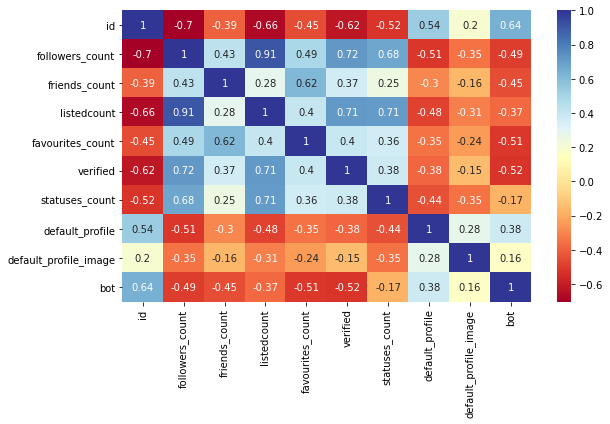

In [38]:
#using spearman correlation
plt.figure(figsize=(9,6))
sns.heatmap(testing_data.corr(method='spearman'), cmap='RdYlBu', annot=True)
plt.tight_layout()
plt.show()

In [21]:
#Drop unwanted features 

training_data.drop(['id_str', 'screen_name', 
                    'location', 'description', 
                    'url', 'created_at', 
                    'lang', 'status',
                    'default_profile',
                    'default_profile_image',
                    'has_extended_profile','name'],axis=1,inplace=True)

In [22]:
training_data.head()

,id,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,bot
0,1.953701e+08,2925,3,139,0,False,708,1
1,7.950000e+17,9,0,5,0,False,6,1
2,2.976541e+09,132,46,24,740,False,7346,1
3,2.243832e+08,54,1351,0,2,False,6,1
4,1.134712e+07,1300380,24248,7089,4184,True,8536,0


In [23]:
testing_data.drop(['id_str', 'screen_name', 
                    'location', 'description', 
                    'url', 'created_at', 
                    'lang', 'status',
                    'default_profile',
                    'default_profile_image',
                    'has_extended_profile','name'],axis=1,inplace=True)

In [24]:
testing_data.head()

,id,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,bot
0,2.651040e+08,59756,1134,490,7356,True,8334,0
1,2.831214e+09,172,69,21,5,False,1065316,1
2,2.568854e+09,98,2,19,0,False,3621,1
3,1.431117e+09,14917,227,27,919,False,53398,1
4,1.838452e+07,7011,315,173,1820,False,631,0


In [25]:
#Extracted features

features = ['followers_count', 'friends_count', 'listedcount', 'favourites_count', 'verified', 'statuses_count','bot']